# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline is no longer needed for newer versions of Jupyter Notebook

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
df[df.duplicated(['login_time'])==True].count()

login_time    877
dtype: int64

In [7]:
# There are 877 duplicated rows but this is not a problem.
# More than one user logged in the same second

In [8]:
df['users'] = 1 # each record stands for one login
df.head()

,login_time,users
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [9]:
df.set_index('login_time', inplace=True)
df.head()

,users
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [10]:
df_resampled = df.resample('15T').sum()
df_resampled.head()

,users
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [11]:
df_resampled.tail()

,users
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


In [12]:
df_resampled[df_resampled['users']==0].count()

users    407
dtype: int64

In [13]:
# there are 407 time intervals of 15 min when no user logged in

In [14]:
# need login_time as a column in dataframe before using sns.lineplot
df_resampled.reset_index(inplace=True)

In [15]:
df_resampled.columns

Index(['login_time', 'users'], dtype='object')

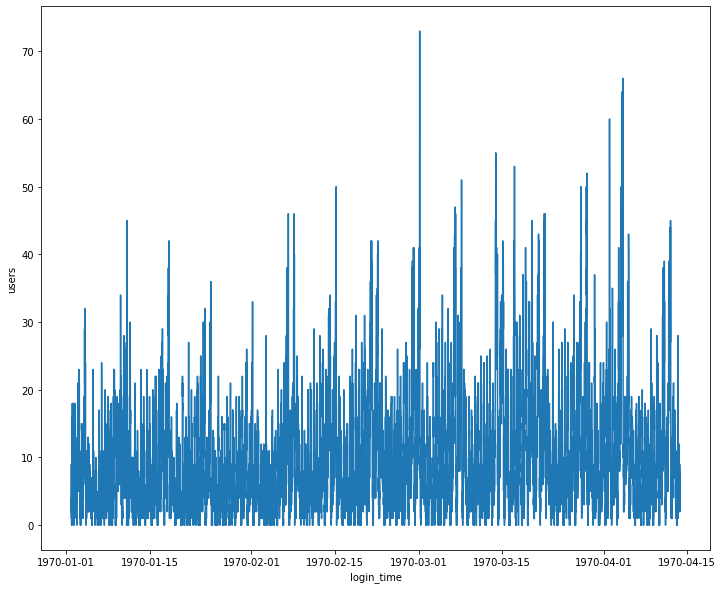

In [16]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='login_time', y='users', data=df_resampled)

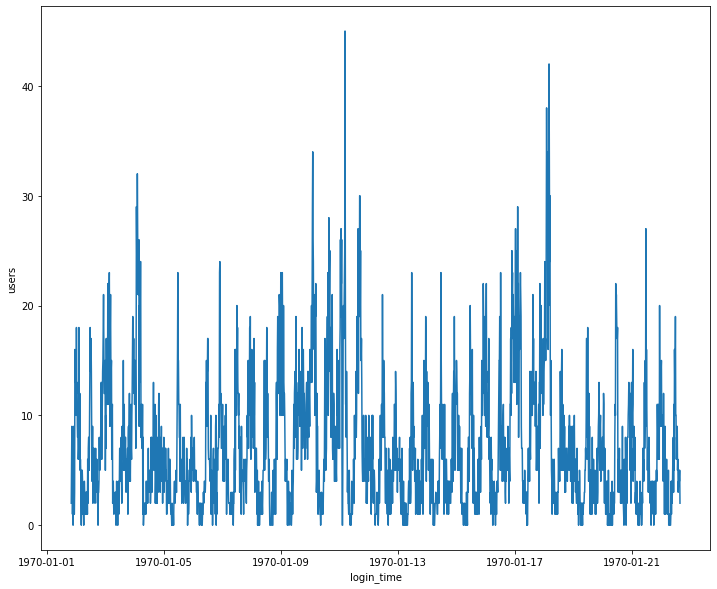

In [17]:
# it looks like there is a pattern in the time series, need to zoom in
plt.figure(figsize=(12, 10))
sns.lineplot(x='login_time', y='users', data=df_resampled[:2000])

In [18]:
# it looks like the pattern has a periodical change every 7 days - and this makes sense
# need to resample daily

In [19]:
df_resampled_daily = df.resample('D').sum()
df_resampled_daily.head()

,users
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


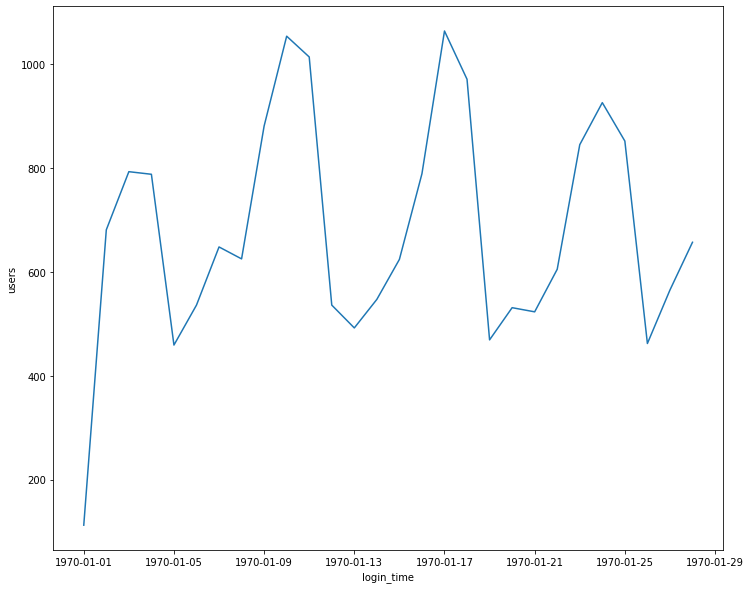

In [20]:
# show the data for the first 28 days (4 weeks)
df_resampled_daily.reset_index(inplace=True)
plt.figure(figsize=(12, 10))
sns.lineplot(x='login_time', y='users', data=df_resampled_daily[:28])

In [21]:
# the weekly periodicity is obvious

In [22]:
df_resampled_daily.head()

,login_time,users
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


In [23]:
df_resampled_daily['login_time']

0     1970-01-01
1     1970-01-02
2     1970-01-03
3     1970-01-04
4     1970-01-05
         ...    
98    1970-04-09
99    1970-04-10
100   1970-04-11
101   1970-04-12
102   1970-04-13
Name: login_time, Length: 103, dtype: datetime64[ns]

In [24]:
from datetime import datetime
print(pd.DatetimeIndex(df_resampled_daily['login_time']).weekday)

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='login_time', length=103)


In [25]:
df_resampled_daily.columns

Index(['login_time', 'users'], dtype='object')

In [26]:
df_resampled_daily['weekday_name'] = pd.DatetimeIndex(df_resampled_daily['login_time']).weekday

In [27]:
df_resampled_daily.columns

Index(['login_time', 'users', 'weekday_name'], dtype='object')

In [28]:
df_resampled_daily['weekday_name'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [29]:
# 0 = Sunday, 1 = Monday, ... , 6 = Saturday

In [30]:
df_resampled_daily['users'].groupby(df_resampled_daily['weekday_name']).sum()

weekday_name
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: users, dtype: int64

In [31]:
# It looks like the number of logins increases from Sunday to Friday and decreases a little bit on Saturday

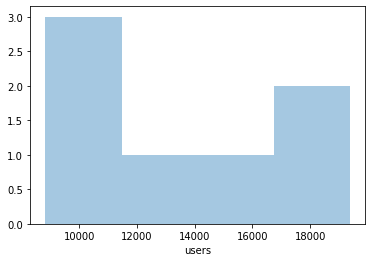

In [32]:
# plot the daily diagram
sns.distplot(df_resampled_daily['users'].groupby(df_resampled_daily['weekday_name']).sum(), bins=4, kde=False)

In [33]:
# As shown above, the distribution of users/day is bimodal
# with the first peak around 10000 users/day and the second peak around 18000 users/day

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

# Answer - part 2

Since during the weekends the activity is reasonable in both cities, this should be the objective, to have a similar activity during the weekdays. Since it is a good idea to make a test, reimbursing the toll costs should be available only for a certain number of drivers from both cities.

This is a typical A/B test, so a successfull test would mean that H0 can be rejected (nothing changes after tax reimbursement) and the change should be in the right direction so both cities should become better served by the drivers.

The experiment should be taken on a longer timeframe (many weeks or months) in order to reduce random noise and to take into account several intervals weekdays-weekends. An even better idea would be to use k-fold and cross-validation in order to avoid a certain bias for the drivers for chosen for the test. After a few weeks, a different chunk of drivers should be selected.

However, before running the experiment more data must be acquired. Why was that toll tax put in place? Was it for discouraging the traffic on the bridges during weekdays? Are there any traffic statistics available before the tax (weekdays versus weekends)? Are there signifficant differences during different seasons?

A z-test may be appropriate because we probably have the standard deviation. Interpreting the results would be done by confidence intervals between means of the sample population (selected drivers) and the values during the weekend. However, even if the experiment does not reach the weekend valiues, the problem may be in another feature that was not analysed (higher traffic, increased gas costs, reduced need to travel between the two cities, etc). Therefore we need as many relevant features as possible before running the experiment.

# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [34]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [35]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [37]:
# signup_date and last_trip_date must be converted to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [39]:
# There are null values for avg_rating_of_driver, phone and avg_rating_by_driver. Especially avg_rating_of_driver
# is damaging. Replacing the null values with values like mean or median would affect the distribution.
# I prefer dropping all records with null values even if this means dropping almost 20% of the observations.
# The remaining 41000 observations can provide a good base for analysis.

In [40]:
df_not_null = df.dropna()

In [41]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  object        
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  bool          
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [42]:
# There are 3 categorical features that must be converted

In [43]:
df_not_null.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [44]:
df_not_null.phone.unique()

array(['iPhone', 'Android'], dtype=object)

In [45]:
df_not_null.ultimate_black_user.unique()

array([ True, False])

In [46]:
# The previous 3 categorical features must be one hot encoded for proper processing
df_one_hot_encoded = df_not_null.copy()

In [47]:
city_one_hot_encoding = pd.get_dummies(df_one_hot_encoded['city'])

In [48]:
city_one_hot_encoding

,Astapor,King's Landing,Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
49993,1,0,0
49994,1,0,0
49995,0,1,0
49997,0,0,1


In [49]:
df_one_hot_encoded = df_one_hot_encoded.join(city_one_hot_encoding)
df_one_hot_encoded = df_one_hot_encoded.drop('city',axis = 1)

In [50]:
df_one_hot_encoded.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'Astapor', 'King's Landing', 'Winterfell'],
      dtype='object')

In [51]:
df_one_hot_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,1


In [52]:
phone_one_hot_encoding = pd.get_dummies(df_one_hot_encoded['phone'])
ultimate_black_user_one_hot_encoding = pd.get_dummies(df_one_hot_encoded['ultimate_black_user'])
df_one_hot_encoded = df_one_hot_encoded.join(phone_one_hot_encoding)
df_one_hot_encoded = df_one_hot_encoded.join(ultimate_black_user_one_hot_encoding)
df_one_hot_encoded = df_one_hot_encoded.drop('phone',axis = 1)
df_one_hot_encoded = df_one_hot_encoded.drop('ultimate_black_user',axis = 1)

In [53]:
df_one_hot_encoded.columns

Index(['trips_in_first_30_days',            'signup_date',
         'avg_rating_of_driver',              'avg_surge',
               'last_trip_date',              'surge_pct',
                  'weekday_pct',               'avg_dist',
         'avg_rating_by_driver',                'Astapor',
               'King's Landing',             'Winterfell',
                      'Android',                 'iPhone',
                          False,                     True],
      dtype='object')

In [54]:
# "False" and "True" column names are not very useful, they resulteted from one hot encoding
# of the "ultimate_black_user". These names must be changed

In [55]:
df_final = df_one_hot_encoded.rename(columns={False: "non_ultimate_black_user", True: "ultimate_black_user"})

In [56]:
df_final.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'Astapor', 'King's Landing', 'Winterfell',
       'Android', 'iPhone', 'non_ultimate_black_user', 'ultimate_black_user'],
      dtype='object')

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trips_in_first_30_days   41445 non-null  int64         
 1   signup_date              41445 non-null  datetime64[ns]
 2   avg_rating_of_driver     41445 non-null  float64       
 3   avg_surge                41445 non-null  float64       
 4   last_trip_date           41445 non-null  datetime64[ns]
 5   surge_pct                41445 non-null  float64       
 6   weekday_pct              41445 non-null  float64       
 7   avg_dist                 41445 non-null  float64       
 8   avg_rating_by_driver     41445 non-null  float64       
 9   Astapor                  41445 non-null  uint8         
 10  King's Landing           41445 non-null  uint8         
 11  Winterfell               41445 non-null  uint8         
 12  Android                  41445 n

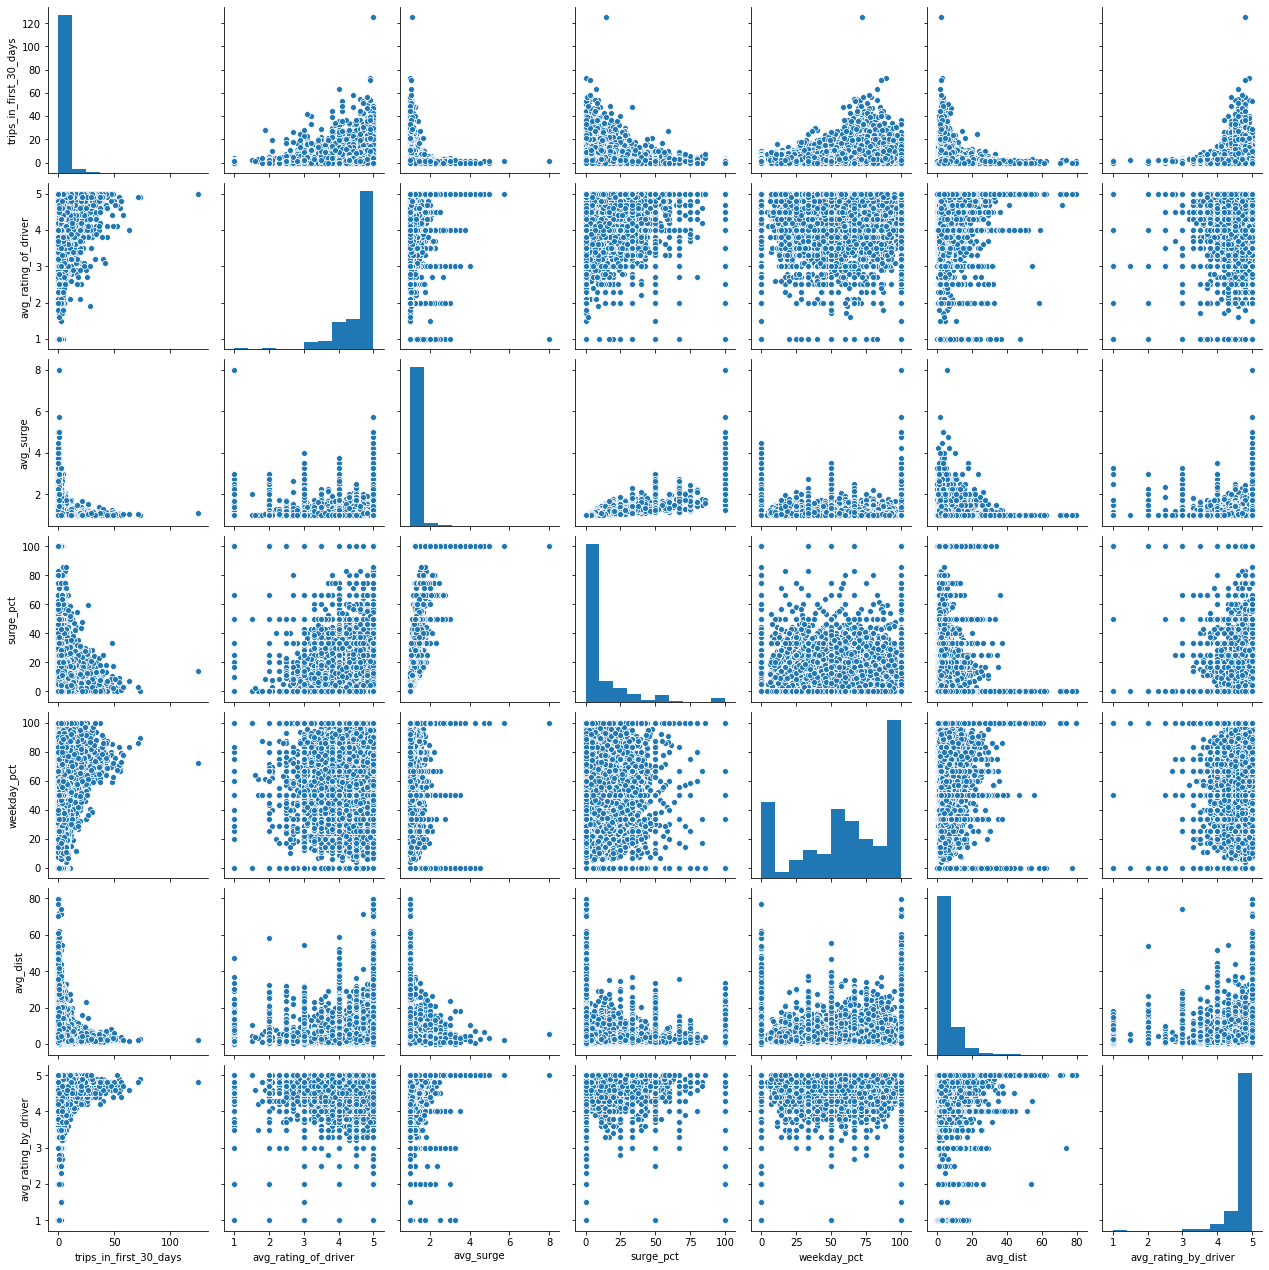

In [58]:
# For readability, show only the numerical columns in the pairplot
sns.pairplot(df_final[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']])

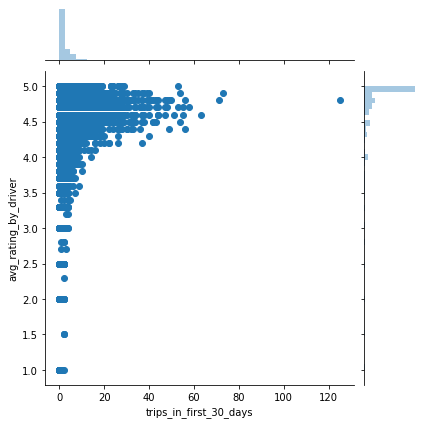

In [59]:
# Besides expected correlations like the one between 'trips_in_first_30_days' and 'surge_pct',
# there are interesting correlations like this one:
sns.jointplot(df_final['trips_in_first_30_days'], df_final['avg_rating_by_driver'])

In [60]:
# This means that if the number of trips is higher, the rating by driver increases 
# in a highly nonlinear way

Text(0.5, 1, '\nHeatmap: Gotham and Metropolis Features\n')

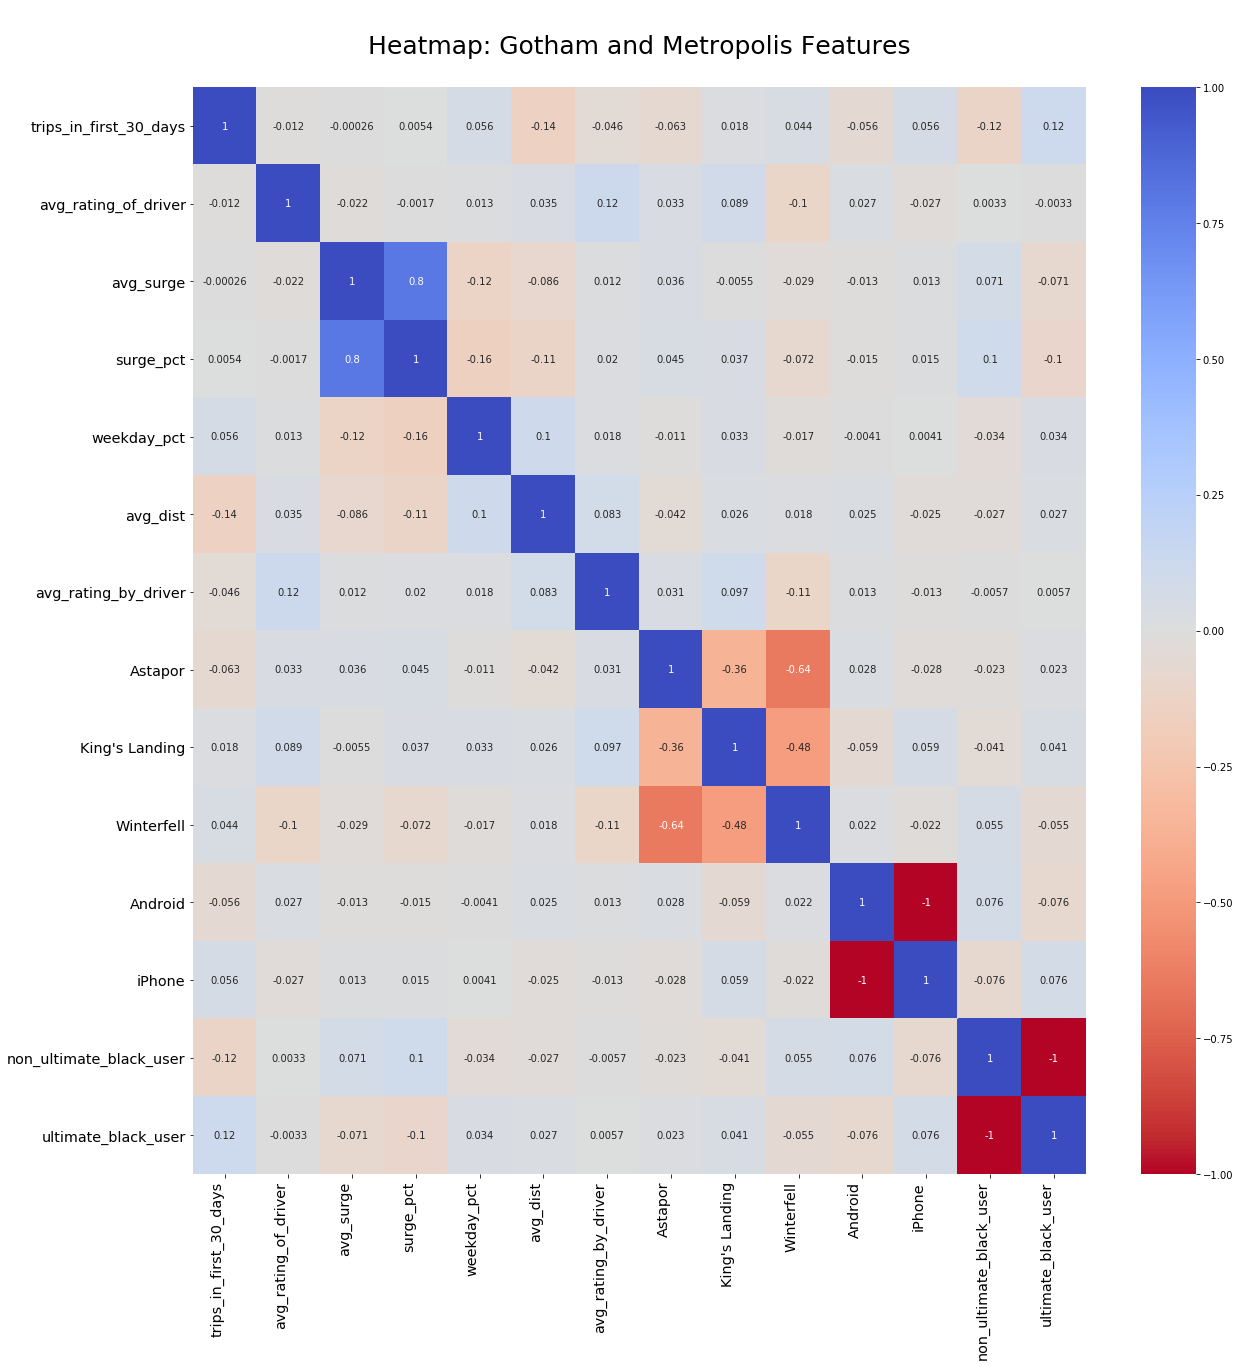

In [61]:
plt.figure(figsize=(20,20))
plt.xticks(
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.yticks(
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
ax = sns.heatmap(df_final.corr(),cmap='coolwarm_r',annot=True)
plt.title('\nHeatmap: Gotham and Metropolis Features\n', fontsize=25)

In [62]:
# The correlation = 1 on the first diagonal is natural
# The last 7 features are one-hot encodings of categorical features with only 2 or 3 categories
# so it's natural to have high correlations there.
# However, there is one correlation of 0.8 that is shown in the heatmap,
# the one between avg_surge and surge_pct:

# surge_pct: the percent of trips taken with surge multiplier > 1
# avg_surge: The average surge multiplier over all of this user’s trips

# Other correlations are not too strong but combining them may increase their effect.

# Now, I need to create the y column. Active users are the ones that had at least one trip during the last 30 days.

In [63]:
last_datetime = df_final.last_trip_date.max()
print(last_datetime)

2014-07-01 00:00:00


In [64]:
df_final['active'] = 0

In [68]:
# active users have at least one observation newer than 30 days
df_final['active'] = (df_final['last_trip_date'] >= '2014-06-01')

In [69]:
df_final.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,iPhone,non_ultimate_black_user,ultimate_black_user,active
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0,False


In [71]:
# The 'active' column is boolean but we need it to be 0 or 1:
df_final['active'] = df_final['active']*1

In [75]:
df_final.drop('last_trip_date', axis=1, inplace=True)

In [76]:
df_final.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,iPhone,non_ultimate_black_user,ultimate_black_user,active
0,4,2014-01-25,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1,1
1,0,2014-01-29,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0,0
2,3,2014-01-06,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1,1
4,14,2014-01-27,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0,0


In [77]:
# "y" = df_final['active']
# "X" = everything else

In [78]:
y = df_final['active']
X = df_final.drop('active', axis=1)

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trips_in_first_30_days   41445 non-null  int64         
 1   signup_date              41445 non-null  datetime64[ns]
 2   avg_rating_of_driver     41445 non-null  float64       
 3   avg_surge                41445 non-null  float64       
 4   surge_pct                41445 non-null  float64       
 5   weekday_pct              41445 non-null  float64       
 6   avg_dist                 41445 non-null  float64       
 7   avg_rating_by_driver     41445 non-null  float64       
 8   Astapor                  41445 non-null  uint8         
 9   King's Landing           41445 non-null  uint8         
 10  Winterfell               41445 non-null  uint8         
 11  Android                  41445 non-null  uint8         
 12  iPhone                   41445 n

In [81]:
# signup_date shouldn't be needed because the experiment lasted for a long time (several months)
# so I will drop this datetime column in order to keep things simple

In [82]:
X = X.drop('signup_date', axis=1)

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trips_in_first_30_days   41445 non-null  int64  
 1   avg_rating_of_driver     41445 non-null  float64
 2   avg_surge                41445 non-null  float64
 3   surge_pct                41445 non-null  float64
 4   weekday_pct              41445 non-null  float64
 5   avg_dist                 41445 non-null  float64
 6   avg_rating_by_driver     41445 non-null  float64
 7   Astapor                  41445 non-null  uint8  
 8   King's Landing           41445 non-null  uint8  
 9   Winterfell               41445 non-null  uint8  
 10  Android                  41445 non-null  uint8  
 11  iPhone                   41445 non-null  uint8  
 12  non_ultimate_black_user  41445 non-null  uint8  
 13  ultimate_black_user      41445 non-null  uint8  
dtypes: float64(6), int64(1

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [89]:
# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

29011 29011 12434 12434


In [100]:
# Try with number of trees = 50 

In [97]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7443300627312208


In [101]:
# Try with number of trees = 500

In [98]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7477078976998552


In [103]:
# with n_estimators = 500, the accuracy is a little bit better than before
# There are lots of parameters for RandomForestClassifier
# but fine-tuning the model is outside the scope of this exercise

# Last thing to do: find the most important features

In [99]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [115]:
feature_imp = pd.Series(clf.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
feature_imp

avg_dist                   0.275055
weekday_pct                0.143179
avg_rating_by_driver       0.116189
surge_pct                  0.083647
trips_in_first_30_days     0.081784
avg_rating_of_driver       0.081204
avg_surge                  0.068739
King's Landing             0.046959
iPhone                     0.021031
Android                    0.019524
ultimate_black_user        0.017802
non_ultimate_black_user    0.017793
Astapor                    0.015804
Winterfell                 0.011292
dtype: float64

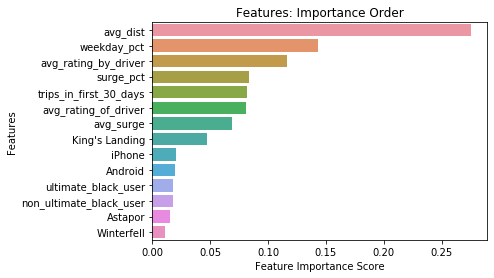

In [118]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features: Importance Order")
plt.show()

In [ ]:
# The top 3 features are: avg_dist, weekday_pct and avg_rating_by_driver.
# Interestingly, the phone type (iPhone or Android) is not the least important feature.
# Maybe the phone type tells something about the users's behaviour

In [119]:
# Let's try removing the least important features and run the model again
X_important_features = X.drop(['iPhone','Android','ultimate_black_user',
                               'non_ultimate_black_user','Astapor','Winterfell'], axis=1)

In [120]:
X_important_features.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'King's Landing'],
      dtype='object')

In [121]:
# From all the categorical features, only "King's Landing" have a certain importance and was kept here

In [126]:
clf_important_features=RandomForestClassifier(n_estimators=500)
clf_important_features.fit(X_train,y_train)
y_pred=clf_important_features.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7495576644683931


In [127]:
# There is a tiny accuracy increase (0.7495 versus 0.7477 with all features).
# The increase is so small that it can be a random result.
# For analysing if the increase is reproductible in several models, we may use KFold
# but again, this is outside the scope of this exercise.

In [128]:
# For giving useful insights gained from the model to improve rider retention,
# I would reccommend handling the weekday_pct feature (the second most important feature).
# avg_distance and avg_rating_by_driver is not within the control of the Ultimate managers
# but they can modify the points and the strategy for giving these points.